Imports

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

import os
from os import listdir
from os.path import isfile, join
import glob
pd.set_option('display.max_columns', 50)

#### Read all files and check the dfs

In [214]:
folder = "\Archive_2_2"
#folder = ""
households = pd.read_csv(f"..\Datalogs{folder}\Households.csv")
cons_firms = pd.read_csv(f"..\Datalogs{folder}\Consumer_Firms.csv")
cap_firms = pd.read_csv(f"..\Datalogs{folder}\Capital_Firms.csv")
pboard = pd.read_csv(f"..\Datalogs{folder}\Public_Info_Board.csv")

Check dataframes

In [215]:
households

wealth_financial wealth_human expenditure_consumption expenditure_tax  \
0       1503.000000     0.000000                0.000000        0.000000   
1       1137.000000     0.000000                0.000000        0.000000   
2       1147.000000     0.000000             1157.000000        0.000000   
3       1520.000000     0.000000              908.000000        0.000000   
4       1520.000000     0.000000                0.000000        0.000000   
..              ...          ...                     ...             ...   
60      1508.000000     0.000000                0.000000        0.000000   
61      1508.000000     0.000000                2.000000        0.000000   
62      1140.000000     0.000000                0.000000        0.000000   
63      1140.000000     0.000000                1.000000        0.000000   
64      1508.000000     0.000000                2.000000        0.000000   

   consumption_propensity new_savings cash_on_hand_real_desired  \
0                0.751837    0.000000                  0.000000   
1                0.568681    0.000000                  0.000000   
2                0.568681   10.000000                  0.000000   
3                0.751837   17.000000                  0.000000   
4                0.751837   17.000000                  0.000000   
..                    ...         ...                       ...   
60               0.751837    5.000000                  0.000000   
61               0.751837    5.000000                  0.000000   
62               0.568681    3.000000                  0.000000   
63               0.568681    3.000000                  0.000000   
64               0.751837    5.000000                  0.000000   

   cash_on_hand_desired cash_on_hand_current saving_propensity  \
0              0.000000             0.000000          0.283946   
1              0.000000             0.000000          0.222894   
2            335.000000             0.000000          0.222894   
3            577.000000             0.000000          0.383946   
4            528.000000             0.000000          0.383946   
..                  ...                  ...               ...   
60            -3.000000             0.000000          0.383946   
61            -3.000000             0.000000          0.383946   
62            -2.000000             0.000000          0.322894   
63            -2.000000             0.000000          0.322894   
64            -3.000000             0.000000          0.383946   

   saving_propensity_optimist saving_propensity_pessimist income_current  \
0                    0.283946                    0.383946       0.000000   
1                    0.222894                    0.322894       0.000000   
2                    0.222894                    0.322894    1503.000000   
3                    0.283946                    0.383946    1503.000000   
4                    0.283946                    0.383946       0.000000   
..                        ...                         ...            ...   
60                   0.283946                    0.383946       0.000000   
61                   0.283946                    0.383946       0.000000   
62                   0.222894                    0.322894       0.000000   
63                   0.222894                    0.322894       0.000000   
64                   0.283946                    0.383946       0.000000   

   income_average  income_wage income_unemployment_benefit  \
0        0.000000     0.000000                    0.000000   
1        0.000000     0.000000                    0.000000   
2     1503.000000  1503.000000                    0.000000   
3     1503.000000  1503.000000                    0.000000   
4     1377.000000     0.000000                    0.000000   
..            ...          ...                         ...   
60      -8.000000     0.000000                    0.000000   
61      -8.000000     0.000000                    0.000000   
62      -8.000000    

In [216]:
cons_firms

production_current  production_planned  production_past  quantity_sold  \
0          6800.000000            0.000000         0.000000    3460.000000   
1          4497.000000         4497.000000      6800.000000    3460.000000   
2             0.000000            0.000000      4497.000000     116.000000   
3             0.000000            0.000000         0.000000       0.000000   
4             0.000000            0.000000         0.000000       0.000000   
5             0.000000            0.000000         0.000000       0.000000   
6             0.000000            0.000000         0.000000       0.000000   
7             0.000000            0.000000         0.000000       0.000000   
8             0.000000            0.000000         0.000000       0.000000   
9             0.000000            0.000000         0.000000       0.000000   
10            0.000000            0.000000         0.000000       0.000000   
11            0.000000            0.000000         0.000000       0.000000   
12            0.000000            0.000000         0.000000       0.000000   
13            0.000000            0.000000         0.000000       0.000000   
14            0.000000            0.000000         0.000000       1.000000   
15            0.000000            0.000000         0.000000       1.000000   
16  production_current  production_planned  production_past  quantity_sold   
17         6800.000000            0.000000         0.000000    1889.000000   
18         6800.000000         9908.000000      6800.000000    1889.000000   
19         2883.000000         2883.000000      6800.000000     145.000000   
20            0.000000            0.000000      2883.000000       0.000000   
21            0.000000            0.000000         0.000000       0.000000   
22            0.000000            0.000000         0.000000       0.000000   
23            0.000000            0.000000         0.000000       0.000000   
24            0.000000            0.000000         0.000000       0.000000   
25            0.000000            0.000000         0.000000       0.000000   
26            0.000000            0.000000         0.000000       0.000000   
27            0.000000            0.000000         0.000000       0.000000   
28            0.000000            0.000000         0.000000       0.000000   
29            0.000000            0.000000         0.000000       0.000000   
30            0.000000            0.000000         0.000000       0.000000   
31            0.000000            0.000000         0.000000       0.000000   
32            0.000000            0.000000         0.000000       1.000000   

    total_income  revenue_sales  new_loan_issuance  subsidies  \
0       0.000000       0.000000           0.000000   0.000000   
1   46218.000000   46218.000000       27207.000000   0.000000   
2    2064.000000    2064.000000       27207.000000   0.000000   
3       0.000000       0.000000       27207.000000   0.000000   
4       0.000000       0.000000       27207.000000   0.000000   
5       0.000000       0.000000       27207.000000   0.000000   
6       0.000000       0.000000       27207.000000   0.000000   
7       0.000000       0.000000       27207.000000   0.000000   
8       0.000000       0.000000       27207.000000   0.000000   
9       0.000000       0.000000       27207.000000   0.000000   
10      0.000000       0.000000       27207.000000   0.000000   
11      0.000000       0.000000       27207.000000   0.000000   
12      0.000000       0.000000       27207.000000   0.000000   
13      0.000000       0.000000       27207.000000   0.000000   
14      1.000000       1.000000       27207.000000   0.000000   
15      1.000000       1.000000       27207.000000   0.000000   
16  total_income  revenue_sales  new_loan_issuance  subsidies   
17      0.000000       0.000000           0.000000   0.000000   
18  25232.000000   25232.000000       73455.000000   0.000000   
19   1936.000000    1936.000000       73455.000000 

In [217]:
cap_firms

production_current  production_planned  production_past  \
0           680.000000            0.000000         0.000000   
1           680.000000         1074.000000       680.000000   
2             0.000000            0.000000       680.000000   
3             0.000000            0.000000         0.000000   
4             0.000000            0.000000         0.000000   
5             0.000000            0.000000         0.000000   
6             0.000000            0.000000         0.000000   
7             0.000000            0.000000         0.000000   
8             0.000000            0.000000         0.000000   
9             0.000000            0.000000         0.000000   
10            0.000000            0.000000         0.000000   
11            0.000000            0.000000         0.000000   
12            0.000000            0.000000         0.000000   
13            0.000000            0.000000         0.000000   
14            0.000000            0.000000         0.000000   
15            0.000000            0.000000         0.000000   
16  production_current  production_planned  production_past   
17          680.000000            0.000000         0.000000   
18          408.000000          408.000000       680.000000   
19            0.000000            0.000000       408.000000   
20            0.000000            0.000000         0.000000   
21            0.000000            0.000000         0.000000   
22            0.000000            0.000000         0.000000   
23            0.000000            0.000000         0.000000   
24            0.000000            0.000000         0.000000   
25            0.000000            0.000000         0.000000   
26            0.000000            0.000000         0.000000   
27            0.000000            0.000000         0.000000   
28            0.000000            0.000000         0.000000   
29            0.000000            0.000000         0.000000   
30            0.000000            0.000000         0.000000   
31            0.000000            0.000000         0.000000   
32            0.000000            0.000000         0.000000   

        quantity_sold       total_income      revenue_sales  \
0          236.000000           0.000000           0.000000   
1          236.000000        3152.000000        3152.000000   
2         -469.000000       -6264.000000       -6264.000000   
3        -2315.000000      -19040.000000      -19040.000000   
4        -6455.000000      -42882.000000      -42882.000000   
5       -17009.000000     -112118.000000     -112118.000000   
6       -44464.000000     -180474.000000     -180474.000000   
7      -116107.000000     -429520.000000     -429520.000000   
8      -303140.000000    -1041066.000000    -1041066.000000   
9      -791443.000000    -1430582.000000    -1430582.000000   
10    -2066310.000000    -3714272.000000    -3714272.000000   
11    -5394730.000000    -8410591.000000    -8410591.000000   
12   -14084598.000000   -13354384.000000   -13354384.000000   
13   -36772164.000000   -29820612.000000   -29820612.000000   
14   -96005016.000000   -62442492.000000   -62442492.000000   
15  -250650560.000000  -137681776.000000  -137681776.000000   
16      quantity_sold       total_income      revenue_sales   
17         349.000000           0.000000           0.000000   
18         349.000000        4661.000000        4661.000000   
19        -691.000000       -9230.000000       -9230.000000   
20       -2824.000000      -34035.000000      -34035.000000   
21       -7756.000000      -91706.000000      -91706.000000   
22      -20396.000000     -195545.000000     -195545.000000   
23      -53304.000000     -307964.000000     -307964.000000   
24     -139180.000000     -632825.000000     -632825.000000   
25     -363378.000000    -1454217.000000    -1454217.000000   
26     -948719.000000    -2399690.000000    -2399690.000000   
27    -2476920.000000    -5401463.000000    -5401463.000000   
28    -6466761.000000   -12587946.

In [218]:
pboard.head()

price_level_current price_level_previous cap_price_level_current  \
0           13.357800             0.000000               13.000000   
1           13.357800            13.357800               13.000000   
2           17.797501            13.357800               13.000000   
3           17.500200            17.797501                8.000000   
4           16.217899            17.500200                6.000000   

  cap_price_level_previous average_wage_market average_wage_employed  \
0                 0.000000            0.000000              0.000000   
1                13.000000          975.768982            751.500000   
2                13.000000            0.000000              0.000000   
3                13.000000            0.000000              0.000000   
4                 8.000000            0.000000              0.000000   

     r_rate inflation_current household_sentiment_sum  \
0  0.000000          0.000000                0.000000   
1  0.000000          1.044890                1.000000   
2  0.504938          1.386630                0.000000   
3  0.462055          1.358040                0.000000   
4  0.305270          1.253510                0.000000   

  household_sentiment_percentage cons_firm_sentiment_sum  \
0                       0.000000                0.000000   
1                       0.000000                0.000000   
2                       0.000000                0.000000   
3                       0.000000                0.000000   
4                       0.000000                0.000000   

  cons_firm_sentiment_percentage cap_firm_sentiment_sum  \
0                       0.000000               0.000000   
1                       0.000000               0.000000   
2                       0.000000               0.000000   
3                       0.000000               0.000000   
4                       0.000000               0.000000   

  cap_firm_sentiment_percentage machine_orders machine_orders_planned  \
0                      0.000000       0.000000               0.000000   
1                      0.000000       3.000000               0.000000   
2                      0.000000       3.000000               0.000000   
3                      0.000000       5.000000               0.000000   
4                      0.000000       4.000000               0.000000   

  machine_spending consumer_orders consumer_spending consumption_budgets  \
0         0.000000        0.000000          0.000000            0.000000   
1        40.000000      116.000000       2065.000000         2092.000000   
2        24.000000        0.000000          0.000000            0.000000   
3        32.000000        0.000000          0.000000            0.000000   
4        26.000000        0.000000          0.000000            0.000000   

  consumer_goods_production capital_goods_production  \
0                  0.000000                 0.000000   
1               4497.000000               680.000000   
2                  0.000000                 0.000000   
3                  0.000000                 0.000000   
4                  0.000000                 0.000000   

  consumer_goods_production_planned capital_goods_production_planned  \
0                          0.000000                         0.000000   
1                       4497.000000                      1074.000000   
2                          0.000000                         0.000000   
3                          0.000000                         0.000000   
4                          0.000000                         0.000000   

  n_employed n_unemployed unemp_rate empl_hires new_empl_demand empl_firings  \
0   0.000000     0.000000   0.000000   2.000000        0.000000     0.000000   
1   4.000000     0.000000   0.000000   0.000000        0.000000     0.000000   
2   0.000000     4.000000   2.000000   0.000000       -2.000000     2.000000   
3   0.000000     4.000000   2.000000   0.000000        0.000000     0.000000   
4   0.000000     4.0000

Get sums and averages for each timestep

In [229]:
households_sum = households.groupby('date').sum().reset_index()
households_avg = households.groupby('date').mean().reset_index()
cons_firms_sum = cons_firms.groupby('date').sum().reset_index()
cons_firms_avg = cons_firms.groupby('date').mean().reset_index()
cap_firms_sum = cap_firms.groupby('date').sum().reset_index()
cap_firms_avg = cap_firms.groupby('date').mean().reset_index()

C:\Users\feyzi\AppData\Local\Temp\ipykernel_13192\2356159532.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  households_avg = households.groupby('date').mean().reset_index()
C:\Users\feyzi\AppData\Local\Temp\ipykernel_13192\2356159532.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cons_firms_avg = cons_firms.groupby('date').mean().reset_index()
C:\Users\feyzi\AppData\Local\Temp\ipykernel_13192\2356159532.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only co

In [231]:
households

wealth_financial wealth_human expenditure_consumption expenditure_tax  \
0       1503.000000     0.000000                0.000000        0.000000   
1       1137.000000     0.000000                0.000000        0.000000   
2       1147.000000     0.000000             1157.000000        0.000000   
3       1520.000000     0.000000              908.000000        0.000000   
4       1520.000000     0.000000                0.000000        0.000000   
..              ...          ...                     ...             ...   
60      1508.000000     0.000000                0.000000        0.000000   
61      1508.000000     0.000000                2.000000        0.000000   
62      1140.000000     0.000000                0.000000        0.000000   
63      1140.000000     0.000000                1.000000        0.000000   
64      1508.000000     0.000000                2.000000        0.000000   

   consumption_propensity new_savings cash_on_hand_real_desired  \
0                0.751837    0.000000                  0.000000   
1                0.568681    0.000000                  0.000000   
2                0.568681   10.000000                  0.000000   
3                0.751837   17.000000                  0.000000   
4                0.751837   17.000000                  0.000000   
..                    ...         ...                       ...   
60               0.751837    5.000000                  0.000000   
61               0.751837    5.000000                  0.000000   
62               0.568681    3.000000                  0.000000   
63               0.568681    3.000000                  0.000000   
64               0.751837    5.000000                  0.000000   

   cash_on_hand_desired cash_on_hand_current saving_propensity  \
0              0.000000             0.000000          0.283946   
1              0.000000             0.000000          0.222894   
2            335.000000             0.000000          0.222894   
3            577.000000             0.000000          0.383946   
4            528.000000             0.000000          0.383946   
..                  ...                  ...               ...   
60            -3.000000             0.000000          0.383946   
61            -3.000000             0.000000          0.383946   
62            -2.000000             0.000000          0.322894   
63            -2.000000             0.000000          0.322894   
64            -3.000000             0.000000          0.383946   

   saving_propensity_optimist saving_propensity_pessimist income_current  \
0                    0.283946                    0.383946       0.000000   
1                    0.222894                    0.322894       0.000000   
2                    0.222894                    0.322894    1503.000000   
3                    0.283946                    0.383946    1503.000000   
4                    0.283946                    0.383946       0.000000   
..                        ...                         ...            ...   
60                   0.283946                    0.383946       0.000000   
61                   0.283946                    0.383946       0.000000   
62                   0.222894                    0.322894       0.000000   
63                   0.222894                    0.322894       0.000000   
64                   0.283946                    0.383946       0.000000   

   income_average  income_wage income_unemployment_benefit  \
0        0.000000     0.000000                    0.000000   
1        0.000000     0.000000                    0.000000   
2     1503.000000  1503.000000                    0.000000   
3     1503.000000  1503.000000                    0.000000   
4     1377.000000     0.000000                    0.000000   
..            ...          ...                         ...   
60      -8.000000     0.000000                    0.000000   
61      -8.000000     0.000000                    0.000000   
62      -8.000000    

Calculate number of agents

In [240]:
#timestep = int(households['date'].max())
timestep = 15
n_households = households.shape[0] / (timestep+1)
n_cons_firms = cons_firms.shape[0] / (timestep +1)
n_cap_firms = cap_firms.shape[0] / (timestep +1)
t = np.linspace(0,timestep, timestep +1)

In [241]:
n_households

4.0625

## Plot the data

In [224]:
import matplotlib.pyplot as plt
import random

def plot_values(df, t, average, exclude_cols=[]):
    cols = [col for col in df.columns if col not in exclude_cols]
    num_plots = len(cols)
    num_cols = 3
    num_rows = num_plots // num_cols + (num_plots % num_cols > 0)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
    axs = axs.flatten()

    for i, column in enumerate(cols):
        title = column + ": (average)" if average else column + ": (sum)"
        color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        axs[i].plot(t, df[column], label=title, color=color)
        axs[i].set_xlabel('Timestep')
        axs[i].set_ylabel('Values')
        axs[i].set_title(column)
        axs[i].legend()
        axs[i].grid(True)
    plt.tight_layout()
    plt.show()


### Plot Households

In [227]:
households

wealth_financial wealth_human expenditure_consumption expenditure_tax  \
0       1503.000000     0.000000                0.000000        0.000000   
1       1137.000000     0.000000                0.000000        0.000000   
2       1147.000000     0.000000             1157.000000        0.000000   
3       1520.000000     0.000000              908.000000        0.000000   
4       1520.000000     0.000000                0.000000        0.000000   
..              ...          ...                     ...             ...   
60      1508.000000     0.000000                0.000000        0.000000   
61      1508.000000     0.000000                2.000000        0.000000   
62      1140.000000     0.000000                0.000000        0.000000   
63      1140.000000     0.000000                1.000000        0.000000   
64      1508.000000     0.000000                2.000000        0.000000   

   consumption_propensity new_savings cash_on_hand_real_desired  \
0                0.751837    0.000000                  0.000000   
1                0.568681    0.000000                  0.000000   
2                0.568681   10.000000                  0.000000   
3                0.751837   17.000000                  0.000000   
4                0.751837   17.000000                  0.000000   
..                    ...         ...                       ...   
60               0.751837    5.000000                  0.000000   
61               0.751837    5.000000                  0.000000   
62               0.568681    3.000000                  0.000000   
63               0.568681    3.000000                  0.000000   
64               0.751837    5.000000                  0.000000   

   cash_on_hand_desired cash_on_hand_current saving_propensity  \
0              0.000000             0.000000          0.283946   
1              0.000000             0.000000          0.222894   
2            335.000000             0.000000          0.222894   
3            577.000000             0.000000          0.383946   
4            528.000000             0.000000          0.383946   
..                  ...                  ...               ...   
60            -3.000000             0.000000          0.383946   
61            -3.000000             0.000000          0.383946   
62            -2.000000             0.000000          0.322894   
63            -2.000000             0.000000          0.322894   
64            -3.000000             0.000000          0.383946   

   saving_propensity_optimist saving_propensity_pessimist income_current  \
0                    0.283946                    0.383946       0.000000   
1                    0.222894                    0.322894       0.000000   
2                    0.222894                    0.322894    1503.000000   
3                    0.283946                    0.383946    1503.000000   
4                    0.283946                    0.383946       0.000000   
..                        ...                         ...            ...   
60                   0.283946                    0.383946       0.000000   
61                   0.283946                    0.383946       0.000000   
62                   0.222894                    0.322894       0.000000   
63                   0.222894                    0.322894       0.000000   
64                   0.283946                    0.383946       0.000000   

   income_average  income_wage income_unemployment_benefit  \
0        0.000000     0.000000                    0.000000   
1        0.000000     0.000000                    0.000000   
2     1503.000000  1503.000000                    0.000000   
3     1503.000000  1503.000000                    0.000000   
4     1377.000000     0.000000                    0.000000   
..            ...          ...                         ...   
60      -8.000000     0.000000                    0.000000   
61      -8.000000     0.000000                    0.000000   
62      -8.000000    

In [225]:
#cols_to_exclude = ['date']
#plot_values(households_sum,t,False, cols_to_exclude)
""" cols_to_exclude = ['date', "c_f", "c_h", "c_excess_money", "wealth_human", "consumption_propensity","income_gov_transfers", "income_firm_owner_dividend", 
                   "expenditure_tax", "business_owner","cash_on_hand_real_desired",
                   "saving_propensity_optimist", "saving_propensity_pessimist", "p_majority_op_adoption", "unemp_duration_upper_bound"] """
plot_values(households_avg,t,True, cols_to_exclude)

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1500x0 with 0 Axes>

### Plot Consumer Firms

------ Plotting consumer firms -----


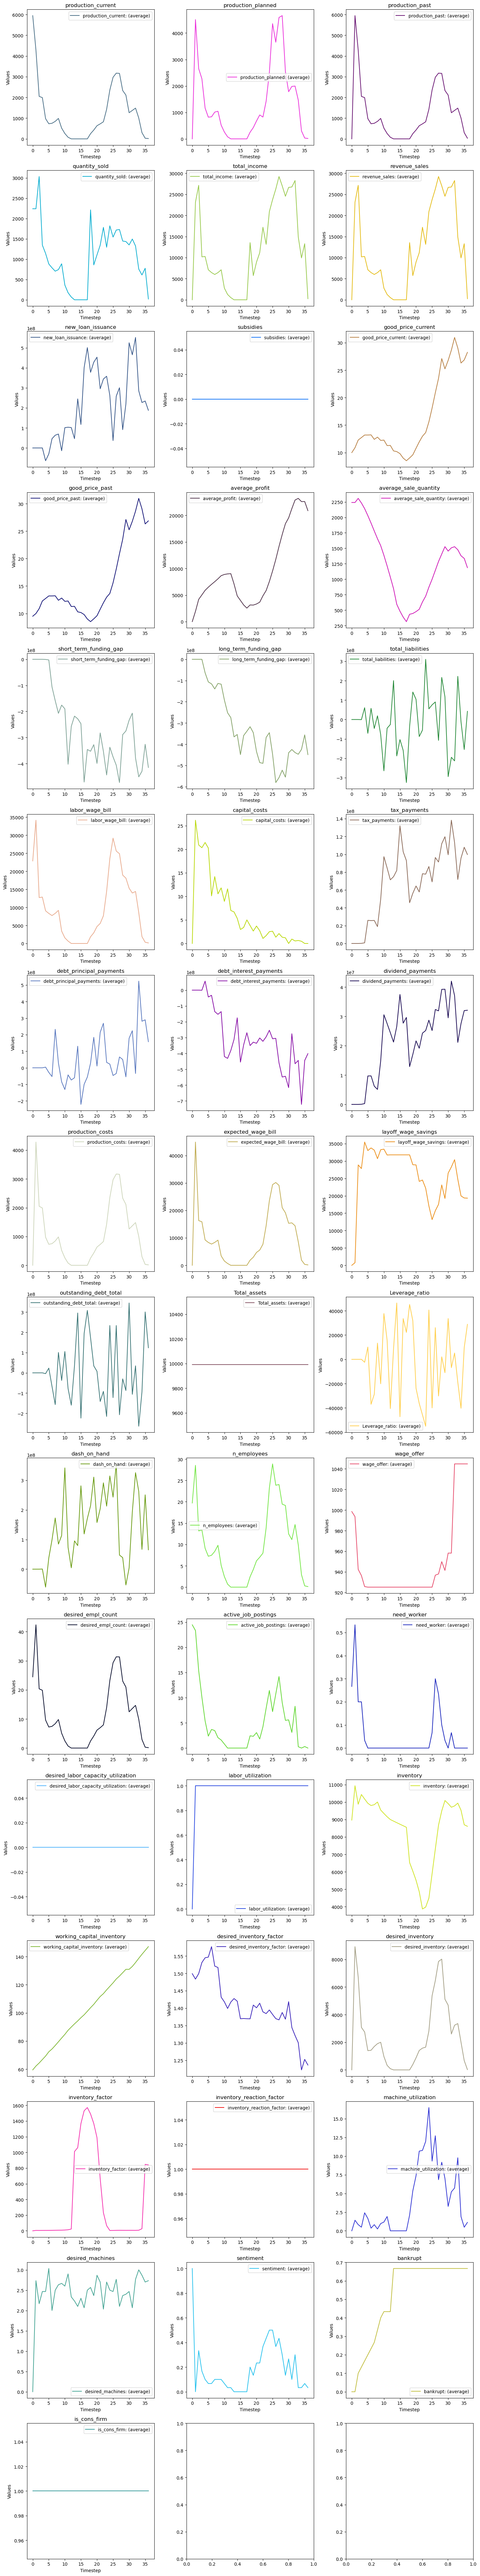

In [ ]:
print("------ Plotting consumer firms -----")
cols_to_exclude = ['date']
#plot_values(cons_firms_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date',"subsides", "dividend_ratio", "dividend_ratio_optimistic", "dividend_ratio_pessimistic"]
plot_values(cons_firms_avg,t,True, cols_to_exclude)

### Capital Firms

------ Plotting capital firms -----


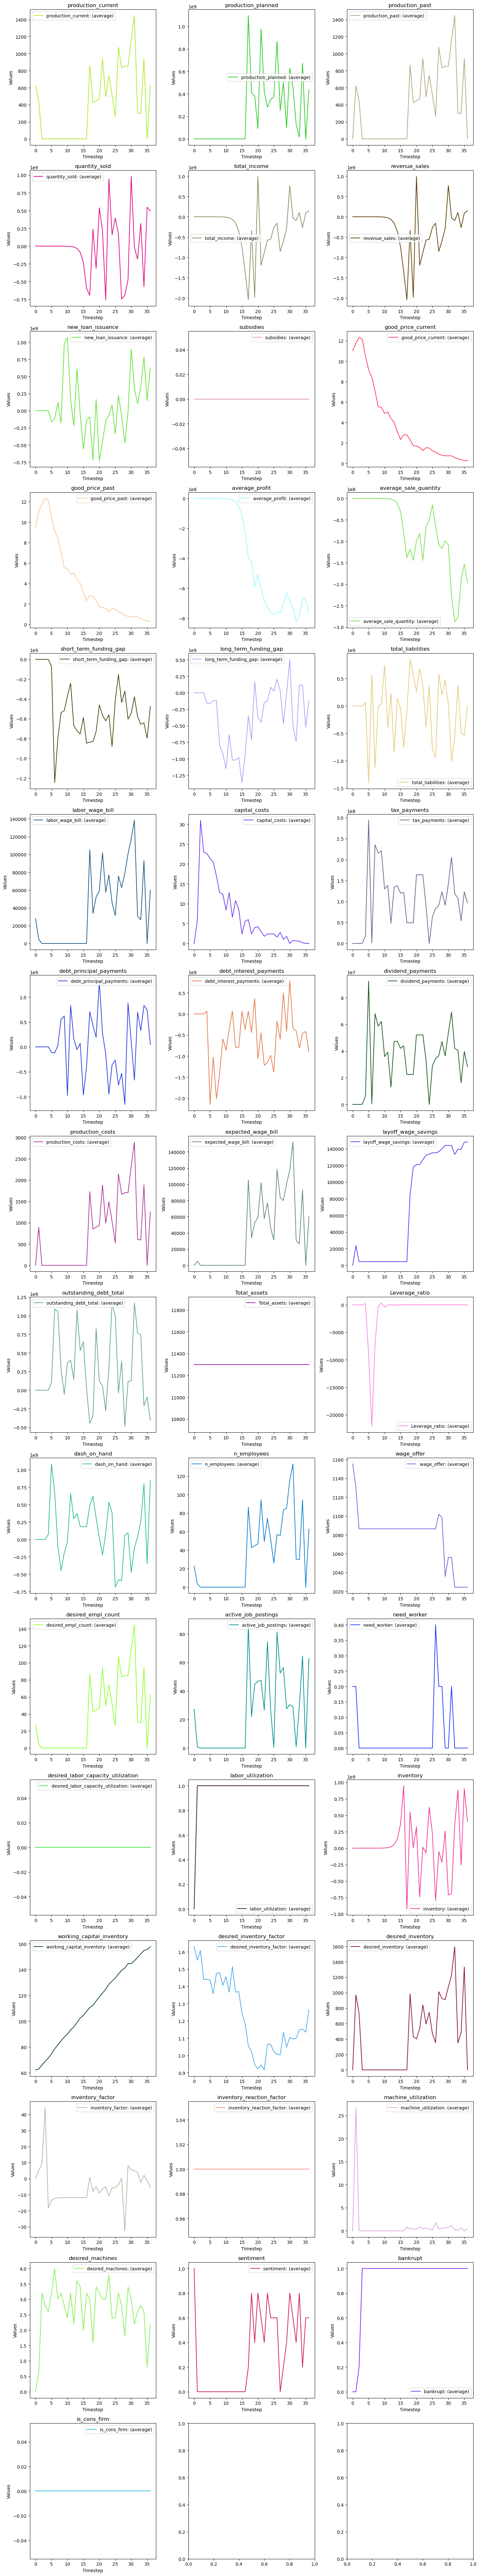

In [ ]:
print("------ Plotting capital firms -----")
cols_to_exclude = ['date']
#plot_values(cap_firms_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date',"subsides", "dividend_ratio", "dividend_ratio_optimistic", "dividend_ratio_pessimistic"]
plot_values(cap_firms_avg,t,True, cols_to_exclude)

### Print Public Board

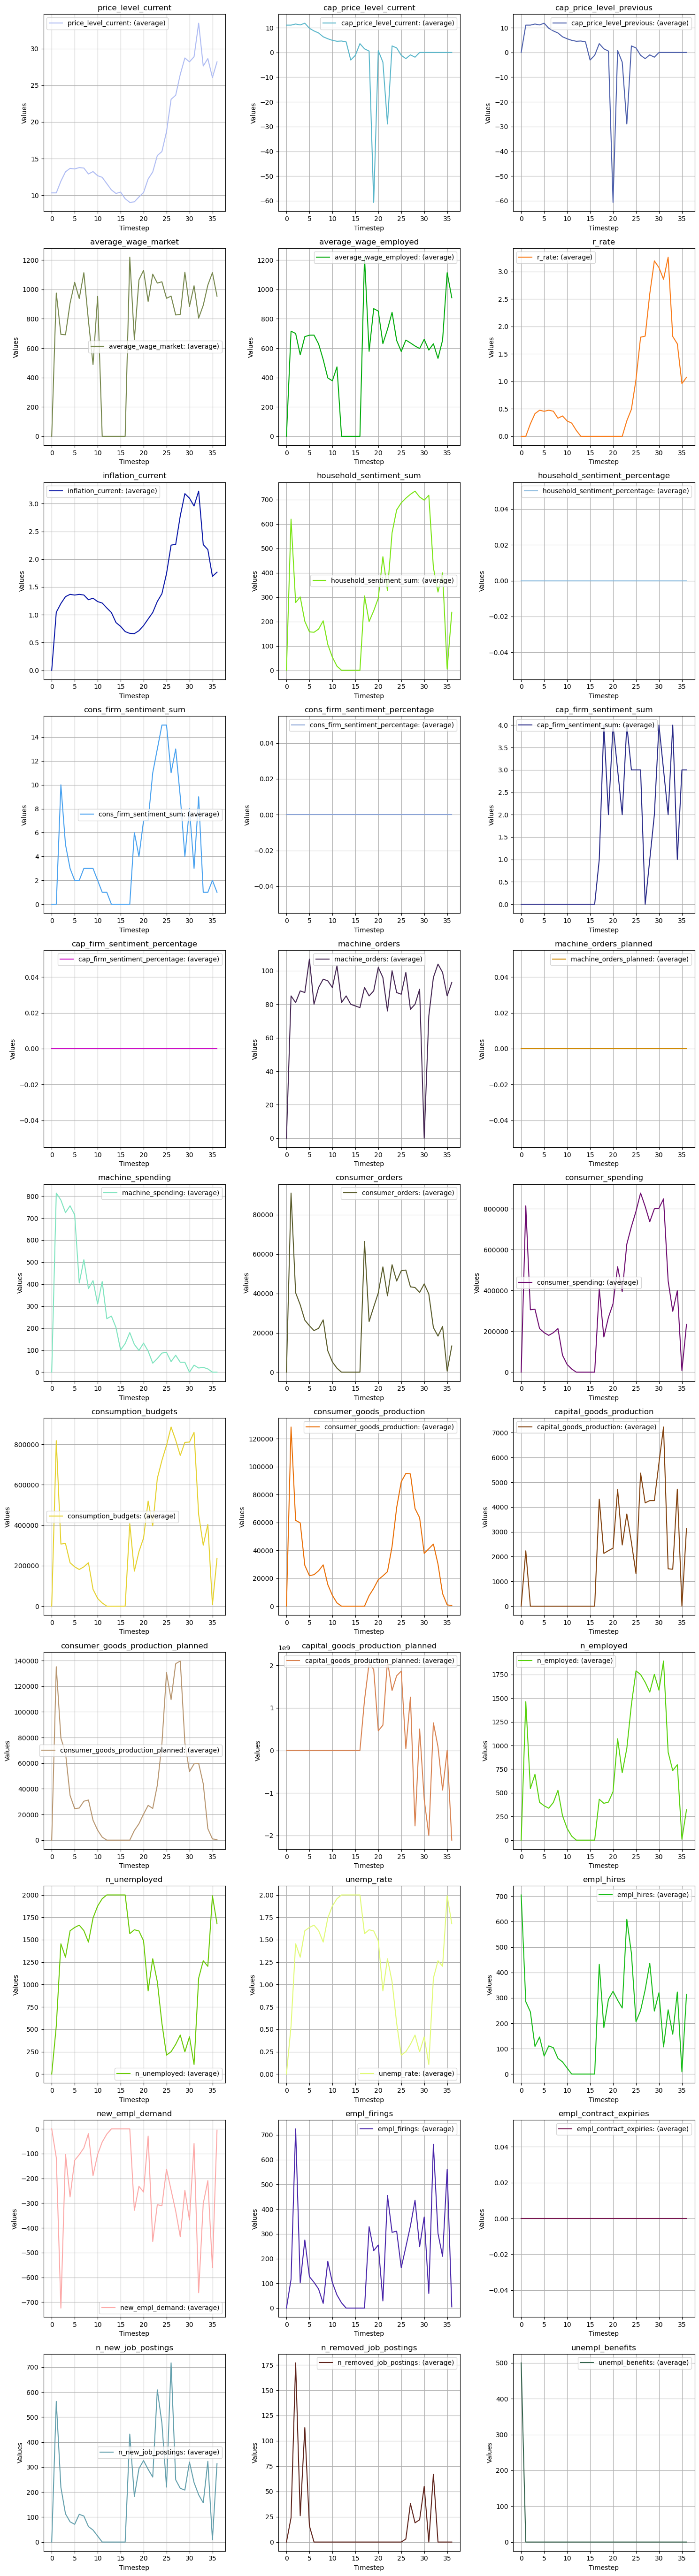

In [ ]:
cols_to_exclude = ['date', "price_level_previous"]
plot_values(pboard,t,True, cols_to_exclude)

To do: